<a href="https://colab.research.google.com/github/seyrankhademi/introduction2AI/blob/main/linear_vs_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

def myfunction(x,y,z,v):
  #check that the points are in range between 0 and 10
  points = np.array([x,y,z,v])
  if (points < 0).all() and (points > 10).all(): 
    print("Error: The points must be between 0 and 10.")

  w1=0.4
  w2=0.1
  w3=0.3
  w4=0.2
  Decision=w1*x+w2*y+w3*z+w4*v
  print("Final score for the applicant is", + Decision)

  if Decision > 5:
   return "The applicant is eligible for scholorship"
  else: 
   return "The applicant is NOT eligible for scholorship"

myfunction(5,7,7,10)

Final score for the applicant is 6.800000000000001


'The applicant is eligible for scholorship'

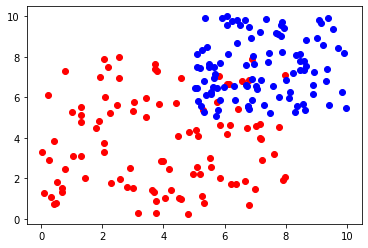

In [192]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
N=100
M=2
fig, ax = plt.subplots()
data1=np.random.uniform(0,8,size=(N,M))
label1=np.ones(N)
ax.scatter(data1[:,0], data1[:,1], c="red")
data2=np.random.uniform(5,10,size=(N,M))
label2=np.zeros(N)
ax.scatter(data2[:,0], data2[:,1], c="blue")
plt.show()
data=np.concatenate((data1, data2), axis=0)
labels=np.concatenate((label1,label2), axis=0)

In [364]:
from sklearn.datasets import make_moons, make_circles, make_classification,make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
data, labels = make_gaussian_quantiles(mean=None, cov=0.4, n_samples=1000, n_features=10, n_classes=2, shuffle=True, random_state=None)
#data, labels = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=0.95, random_state=1)
scaler = MinMaxScaler(feature_range=(0, 10))
X = scaler.fit_transform(data)
pd.DataFrame(X).describe()
X = StandardScaler().fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=.4, random_state=42)

In [368]:
 from sklearn import svm
 from sklearn.neural_network import MLPClassifier
 clf = svm.SVC(kernel='linear')
 #clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(5, 2), learning_rate_init=0.005, max_iter=1000, random_state=1)
# data = StandardScaler().fit_transform(data)
 #clf.fit(data[:,[0, 1]],labels)
 clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [369]:
#data1_test=np.random.uniform(0,8,size=(N,M))
#label1_test=np.ones(N)
#data2_test=np.random.uniform(5,10,size=(N,M))
#label2_test=np.zeros(N)
#data_test=np.concatenate((data1_test, data2_test), axis=0)
#data_test = StandardScaler().fit_transform(data_test)
#y_test=np.concatenate((label1_test,label2_test), axis=0)
#y_test = clf.predict(data_test[:,[0, 1]])
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.485


ValueError: ignored

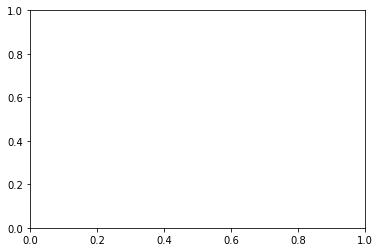

In [367]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
X = X_train
y=y_train
gs = gridspec.GridSpec(2, 2)
#fig = plt.figure(figsize=(10, 8))
fig = plot_decision_regions(X=X, y=y.astype(np.integer),clf=clf, legend=2)